Given Sample data:
 Seq    TV  Radio  Newspaper  Sales
   1 230.1   37.8       69.2   22.1
   2  44.5   39.3       45.1   10.4
   3  17.2   45.9       69.3    9.3
   4 151.5   41.3       58.5   18.5
   5 180.8   10.8       58.4   12.9
   6   8.7   48.9       75.0    7.2
   7  57.5   32.8       23.5   11.8
   8 120.2   19.6       11.6   13.2
   9   8.6    2.1        1.0    4.8
  10 199.8    2.6       21.2   10.6
  11  66.1    5.8       24.2    8.6
  12 214.7   24.0        4.0   17.4
  13  23.8   35.1       65.9    9.2
  14  97.5    7.6        7.2    9.7
  15 204.1   32.9       46.0   19.0
  16 195.4   47.7       52.9   22.4
  17  67.8   36.6      114.0   12.5
  18 281.4   39.6       55.8   24.4
  19  69.2   20.5       18.3   11.3
  20 147.3   23.9       19.1   14.6
  21 218.4   27.7       53.4   18.0
  22 237.4    5.1       23.5   12.5
  23  13.2   15.9       49.6    5.6
  24 228.3   16.9       26.2   15.5
  25  62.3   12.6       18.3    9.7
  26 262.9    3.5       19.5   12.0
  27 142.

C:\Users\dubey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


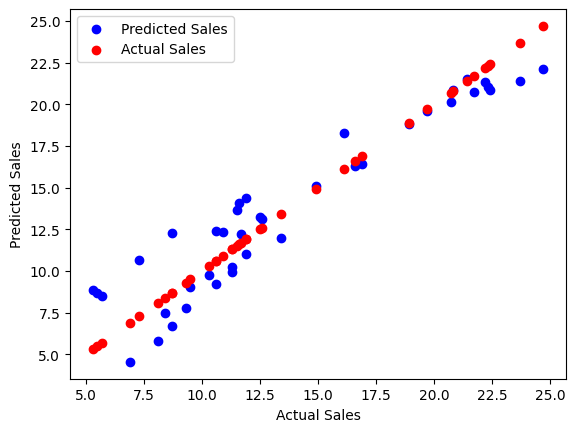

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv(r'D:\Data Science intern\Sales Prediction using python\Advertising.csv')

print("Given Sample data:")
print(df.to_string(index=False))
print()

X = df[['Seq','TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print("Mean Squared Error: {:.4f}".format(mse))
print("R-squared: {:.4f}".format(r2))

print("Coefficients:")
for feature, coefficient in zip(X.columns, model.coef_):
    print("{}: {:.4f}".format(feature, coefficient))

new_data = [[1, 100, 100, 100]]
prediction = model.predict(new_data)

print("Predicted sales: {:.2f}".format(prediction[0]))

plt.scatter(y_test, y_pred, c='blue', label='Predicted Sales')
plt.scatter(y_test, y_test, c='red', label='Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()